<a href="https://colab.research.google.com/github/AndreasKing-Goks/MIR_Deep_Learning/blob/main/TP_02_High_level_MLP_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High level deep learning

## Introduction

In the past lab we have used the low-level API of PyTorch to implement an MLP. We trained the model to fit a synthetic data set and we experimented with different batch sizes and learning rates.

In this lab we will use one of PyTorch high-level APIs: `torch.nn`. This time we will experiment on more complex and natural datasets: MNIST or Fashion-MNIST.


## Objectives
- Learn to use the PyTorch `nn` API
- Build, train and use a simple MLP
- Analyse the some of the predictions and mistakes of the model

## Getting started

We will first import all necessary modules:

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Setup device agnostic code (i.e., train using gpu if abailable, else use cpu)
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = "cpu"
device

'cpu'

# PyTorch data handling

There are two main data-handling objects in PyTorch.
- `torch.utils.data.Dataset`: is an ordered collection of data samples and their labels (if available). PyTorch provides several implementations of these objects for commonly used datasets [here](https://pytorch.org/vision/stable/datasets.html). These usually download the data and have code to access each sample preprocessed with a `torch.transforms` if provided by the user.
- `torch.utils.data.DataLoader`: this class will wrap a `Dataset` with an iterator and serve it sequentially, in mini-batches if requested. When preparing the mini-batches the `DataLoader` must collate several examples into a single tensor. This is done by the `collate_fn` argument that can be passed to the `DataLoader` constructor. In most cases the default implementation of this function is sufficient.  

Here is an example of using these classes to obtain the publicly available FashionMNIST and iterating over it.

In [ ]:
training_data = torchvision.datasets.FashionMNIST(
    root="data/fashionmnist",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)

for epoch in range(2):
    for data, labels in train_dataloader:
        # Here we could do a gradient descent step on our model parameters
        pass

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/fashionmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/fashionmnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/fashionmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/fashionmnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/fashionmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/fashionmnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/fashionmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/fashionmnist/FashionMNIST/raw



## MNIST data

The MNIST database of handwritten digits scanned into gray-scale images. The digits have been size-normalized and centered in a fixed-size image.

We can easily download the data and load it as PyTorch tensors using [`torchvision.datasets.MNIST`](https://pytorch.org/vision/stable/datasets.html#mnist)

The output of torchvision datasets are PILImage images of range $[0, 1]$. We transform them to PyTorch tensors and normalize them to have zero mean and a range of $[-1, 1]$ by creating a transform object and pass it to the dataset constructor:

```
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
```


## Exercise 1
Download and load the train and test splits of the MNIST dataset into variables `train_set` and `test_set`.

In [ ]:
### BEGIN SOLUTION
## Specify the initialization
# bs = 30
# transform = torchvision.transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5), (0.5))])

## Create train and test dataset
# Train dataset (train=True)
MNIST_train = torchvision.datasets.MNIST(
    root='content/sample_data/MNIST/', # Download data to this directory
    train=True, # Specify into the training data
    download=True, # Download data if it is not exist inside the dir folder
    transform=transforms.ToTensor(), # Transform images from PIL format to Torch tensors
    target_transform=None) # do not transform image labels
# Test dataset (train=False)
MNIST_test = torchvision.datasets.MNIST(
    root='content/sample_data/MNIST/', # Download data to this directory
    train=False, # Specify into the test data
    download=True, # Download data if it is not exist inside the dir folder
    transform=transforms.ToTensor(), # Transform images from PIL format to Torch tensors
    target_transform=None) # do not transform image labels
### END SOLUTION

NameError: ignored

Next we are going to explore and visualize the data.

## Exercise 2
Print how many examples there are in total and the size of the images. 

Plot the first example and set the title to its label.

You can access examples in a dataset by indexing it with an integer: ```first_example = my_dataset[0]```

You may use `plt.imshow` to show the examples, use a grayscale colormap when doing so.

Total number of training data are 60000
Total number of test data are 10000
The size of images are torch.Size([28, 28])


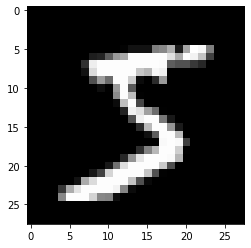

In [ ]:
### BEGIN SOLUTION
# Print how many example in total and the size of images
print("Total number of training data are {}".format(len(MNIST_train)))
print("Total number of test data are {}".format(len(MNIST_test)))
print("The size of images are {}".format(MNIST_train[0][0][0].shape))

# Show one image from training dataset
first_example = MNIST_train[0][0][0]

plt.imshow(first_example, cmap = 'gray')

### END SOLUTION

In [ ]:
(MNIST_train[0][0].shape)

torch.Size([1, 28, 28])

In [ ]:
# MNIST_train type is  torchvision.datasets, has 60000 image in it
# MNIST_train[0] type is tuple, change index different number, containing single number pixel data
# MNIST_train[0][0] type is tensor [1,28,28] shape (this is single channel obtained from the tuple (imagine rgb))
# MNIST_train[0][0][0] type is tensor [28,28] shape (This is the individual image 28 by 28)
# MNIST_train[0][0][0][0] type is tensor [28] shape 
# When the two last index change, plt.imshow is not working
# When the first index changed, plt.imshow shows different pic

We can perform multiple plots using [`Figure.add_subplot`](https://matplotlib.org/stable/api/figure_api.html?highlight=fig%20add_subplot#matplotlib.figure.Figure.add_subplot) like in the following snippet:
```
fig = plt.figure(figsize=(10, 10))
for i, image in enumerate(images):
    ax = fig.add_subplot(n_rows, n_cols, i+1)

    # some code to normalize each image

    ax.imshow(...
```

This function returns an `Axis` object. We may then call the methods `Axis.imshow()`, `Axis.set_xticks()` and `Axis.set_xlabel`.

After all the plotting we may call `plt.tight_layout()` to adjust the layout of the plots.

Finally may use Python's function [`enumerate`](https://docs.python.org/3.6/library/functions.html#enumerate) to keep track of the index of axis object we are operating on.

## Exercise 3
Using `matplotlib` plot a set of 25 images (in a 5x5 grid) and set as their x-label the label assigned to each.

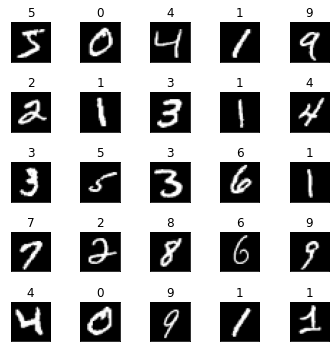

In [ ]:
### BEGIN SOLUTION
n_rows = 5
n_cols = 5
fig = plt.figure(figsize=(n_rows, n_cols))
for i, image in enumerate(MNIST_train):
    # Check if loop overshoot
    if i == n_rows * n_cols:
      break
    
    # Do add subplot
    ax = fig.add_subplot(n_rows, n_cols, i+1)

    # Show plot
    ax.imshow(image[0][0], cmap = 'gray')
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.title.set_text(str(image[1]))
plt.tight_layout()
### END SOLUTION

In [ ]:
## How it works:
# We enumerate MNIST_train, got individual tuple containing image data
# image = MNIST_train[0]
# But then we called image[0][0], which the same expression as MNIST_train[0][0][0]
# Iterating image over MNIST_train would get us MNIST[1][0][0], MNIST[2][0][0] so on and so forth
# However image[1] gives us the label (?)

print(MNIST_train[0][1])
print(MNIST_train[1][1])
print(MNIST_train[2][1])
# print(MNIST_train[0][2]) error

# Because the MNIST_train[0] is tuple
# MNIST_train[0][0] access the image, MNIST_train[0][1] access the label

5
0
4


## PyTorch model

PyTorch uses an object oriented approach to defining models. We must inherit from [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=module#torch.nn.Module) and override the constructor and the `forward` method. For instance te recreate the model we used in our previous lab we will do the following:

```
class MyMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x
```

**Remark**: Note that we have not applied the `torch.sigmoid` activation function on the last layer. Many criterion functions (loss functions) used in PyTorch operate on what we call the *logits*. Logits are the pre-activations of the last layer. In other words, in PyTorch we often don't have an output activation function inside the model and rather let the criterion apply it internally when computing the error.

In our current problem, we must classify each image as one out of 10 different classes. Therefore for the output we will need 10 units. When interpreting as probabilities we will want them to sum to 1, as a probability distribution (multinomial). For this we we will have to apply the output activation function `torch.softmax`. Similarly to the sigmoid it restrains the output of each unit between 0 and 1 using exponentials, but it divides each by their sum (thus ensuring their sum to 1).

$$
\sigma(\mathbf{z})_j = \frac{e^{\mathbf{z}_j}}{\sum_k e^{\mathbf{z}_k}}
$$


## Exercise 4
Build a 2-layer MLP with 100 hidden units to classify each image of MNIST by the digit written.

In [ ]:
# class MyMLP(nn.Module):
#     ### BEGIN SOLUTION
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(28*28, 100)
#         self.fc2 = nn.Linear(100, 10)

#     def forward(self, x):
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = torch.sigmoid(self.fc1(x))
#         x = torch.softmax(self.fc2(x), dim=1)
#         return x
#     ### END SOLUTION

In [ ]:
class MyMLP(nn.Module):
    ### BEGIN SOLUTION
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.fc1 = nn.Linear(input_shape, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_shape)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x
    ### END SOLUTION

Once we instantiate our model we may print it using `print`.

## Exercise 5
Instantiate and print the model.

In [ ]:
### BEGIN SOLUTION
image_size = MNIST_train[0][0].shape
#print(image_size)

input_shape = image_size[0] * image_size[1] * image_size[2]
#print(input_shape)
hidden_units = 100
output_shape = 10

model = MyMLP(input_shape,hidden_units,output_shape)
print(model)
### END SOLUTION

MyMLP(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
## How it works
# First we need to specify the nn model using the nn.linear(input_shape, output_shape)
# Input_shape, output_shape need to be in int format, that is why we use image_size shape (1 x 28 x 28) to get the number of input nodes
# the x = torch.flatten(x,1) is to modify the input data. Input shape != input data.

In [ ]:
t = torch.randn(1,28,28)
t_f0 = torch.flatten(t,0)
t_f1 = torch.flatten(t,1)
t_f2 = torch.flatten(t,2)
print(t.shape)
print(t_f0.shape)
print(t_f1.shape)
print(t_f2.shape)

torch.Size([1, 28, 28])
torch.Size([784])
torch.Size([1, 784])
torch.Size([1, 28, 28])


In [ ]:
# torch.flatten(t,0) completely flatten out the tensor t into 1 dimensional data
# torch.flatten(t,1) flatten out the tensor t into 2 dimensional data
# torch.flatten(t,2) flatten out the tensor t into 3 dimensional data (means it is not changing)

In [ ]:
v = torch.randn(10,3,5,5)
v_f0 = torch.flatten(v,0)
v_f1 = torch.flatten(v,1)
v_f2 = torch.flatten(v,2)
v_f3 = torch.flatten(v,3)
print(v.shape)
print(v_f0.shape)
print(v_f1.shape)
print(v_f2.shape)
print(v_f3.shape)

torch.Size([10, 3, 5, 5])
torch.Size([750])
torch.Size([10, 75])
torch.Size([10, 3, 25])
torch.Size([10, 3, 5, 5])


In [ ]:
# Flattening begins from the end dimension

## PyTorch training

In order to train the model in PyTorch we will need the following ingredients:
 - a **data loader** which will iterate the dataset and construct mini-batches, 
 - a **loss criterion** to measure the error,
 - an **optimizer** to train the model parameters

A default data loader is found in [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). Criterions are found in `torch.nn` and optimizers in `torch.optim`.

We will use a [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) criterion that allows computing the classification error of a multi-class task. When looking at the docs we note that it operates on the logits (pre-activations) and the targets must be integers indicating the class index (this is how the targets are already encoded in the data sets and loaders, no further processing needed).

As optimizer we will use [`torch.optim.SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD) with `lr=0.001` and `momentum=0.9`.

## Exercise 6

Create the data loaders for train and test with a batch size of 16.

In [ ]:
### BEGIN SOLUTION
## Create the data loader
bs = 16
# Train data loader
train_loader = torch.utils.data.DataLoader(MNIST_train,
                                          batch_size=bs,
                                          shuffle=True,)
# Test data loader
test_loader = torch.utils.data.DataLoader(MNIST_test,
                                          batch_size=bs,
                                          shuffle=True,)
### END SOLUTION

## Exercise 7

Create a cross-entropy loss criterion and an SGD optimizer.

In [ ]:
import torch.optim as optim

### BEGIN SOLUTION
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
### END SOLUTION

Now we will train the model by building the training loop in which we will iterate over the data from the data loader.

For each mini-batch in the data loader:
1. zero the gradient
2. run a forward pass of the model on the mini-batch
3. compute the loss between model's output and targets using the criterion
4. perform a backward pass (compute the gradients)
5. run a step of the optimizer
6. print every 1000 iterations the average loss over those past iterations

## Exercise 8
Train your model.

In [ ]:
for train_batch, label in train_loader:
  print(train_batch.shape)
  print(label.shape)
  break

print(type(train_loader))

torch.Size([16, 1, 28, 28])
torch.Size([16])
<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
# MNIST_train[0] tuple (image data and image label)
# MNIST_train[0][0] access the image, MNIST_train[0][1] access the label
# train_loader is a tensor containing batch. each batch holds 16 image data.
# train_loader also hold label, using for loop (x,y)

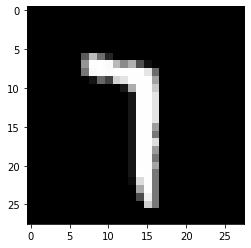

In [ ]:
for train_batch, label in train_loader:
  plt.imshow(train_batch[0][0], cmap='gray')
  #print(train_batch[0][0][0].size())
  break

# The image shown is random because the train_loader shuffle is active

In [ ]:
def train_model(model, dataloader, loss_fn, optimizer, n_epochs=10, delay = 1, verbose=False):
    # Loss for each epoch
    losses = []
    
    # Get the number of batch
    n_batch = len(dataloader)

    # Get the batch size using class __iter__
    batch_size = next(iter(dataloader))[1].shape[0]

    for epoch in range(n_epochs):
        ### BEGIN SOLUTION
        # Loss sum
        loss = 0

        for i, (input,target) in enumerate(dataloader):
          # 1. Zero the gradient
          with torch.no_grad():
            optimizer.zero_grad()

          # 2. Run a forward pass of the model on the mini-batch
          predict = model.forward(input)

          # 3. Compute the loss between model's output and targets using the criterion
          output = loss_fn(predict, target)
          loss += output

          # 4. Perform a backward pass
          output.backward()

          # 5. Run a step of the optimizer 
          with torch.no_grad():
            optimizer.step()

          # 6. Print train progress
          if verbose == True:
            Iteration = epoch*n_batch + i
            if Iteration % delay == 0 and Iteration != 0:
              print(f'Epoch {epoch+1}; Iteration {Iteration}; Iteration Loss: {loss/i:.3}')
        
        # Store epoch loss
        losses.append(loss/n_batch)

        ### END SOLUTION

model = MyMLP(input_shape,hidden_units,output_shape)      
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)
train_model(model, train_loader, loss_fn, optimizer, n_epochs=10, delay = 1000, verbose=True)

Epoch 1; Iteration 1000; Iteration Loss: 2.29
Epoch 1; Iteration 2000; Iteration Loss: 2.24
Epoch 1; Iteration 3000; Iteration Loss: 2.18
Epoch 2; Iteration 4000; Iteration Loss: 1.96
Epoch 2; Iteration 5000; Iteration Loss: 1.9
Epoch 2; Iteration 6000; Iteration Loss: 1.87
Epoch 2; Iteration 7000; Iteration Loss: 1.85
Epoch 3; Iteration 8000; Iteration Loss: 1.8
Epoch 3; Iteration 9000; Iteration Loss: 1.78
Epoch 3; Iteration 10000; Iteration Loss: 1.77
Epoch 3; Iteration 11000; Iteration Loss: 1.76
Epoch 4; Iteration 12000; Iteration Loss: 1.73
Epoch 4; Iteration 13000; Iteration Loss: 1.73
Epoch 4; Iteration 14000; Iteration Loss: 1.73
Epoch 5; Iteration 15000; Iteration Loss: inf
Epoch 5; Iteration 16000; Iteration Loss: 1.71
Epoch 5; Iteration 17000; Iteration Loss: 1.71
Epoch 5; Iteration 18000; Iteration Loss: 1.71
Epoch 6; Iteration 19000; Iteration Loss: 1.71
Epoch 6; Iteration 20000; Iteration Loss: 1.71
Epoch 6; Iteration 21000; Iteration Loss: 1.71
Epoch 6; Iteration 22000;

In [ ]:
## How it works
# batch training: do training per batch. loss returned are the average from the batch data trained

# check the batch size
# check the number of batch in data_loader (train data divided by batch size)
# create storage for each epoch loss 
# do epoch looping
# create loss sum for batch iteration
# batch looping
# zero the grad (within the with torch.no_grad())
# forward pass (do the training)
# compute the loss (y predict - target)
# do the backward operation 
# optimizer.step() inside with torch.no_grad()
# optimizer.step is just updating parameters using the gradient. We dont want to update the gradient here


We will now quickly save the trained model parameters `model.state_dict()` by using `torch.save()`:


## Exercise 9

Save the model into a file names `mnist_model.pt`. Save as well any other information required to continue training from where we left off.

In [ ]:
### BEGIN SOLUTION
torch.save(model.state_dict() , 'mnist_model.pt')
### END SOLUTION

In [ ]:
MNIST_test[0][1]

7

With a trained model, we may now check out the predictions of the model.

## Exercise 10

Visualize the first 25 images of the test set and set each image's title to the predicted digit and in parenthesis the label.

In [ ]:
def pred_to_class(pred):
    '''
    Converts prediction to class
    '''
    return torch.argmax(pred, dim=-1)

In [ ]:
print(model(MNIST_test[0][0]))
# This is the prediction from Neural Network (see Softmax, with 10 item, they are prediction. Max returned to get the most confident guess)

tensor([[2.5568e-07, 4.4908e-10, 3.7103e-07, 9.1425e-06, 2.9875e-09, 2.1774e-06,
         2.0706e-11, 9.9978e-01, 1.8903e-08, 2.0707e-04]],
       grad_fn=<SoftmaxBackward0>)


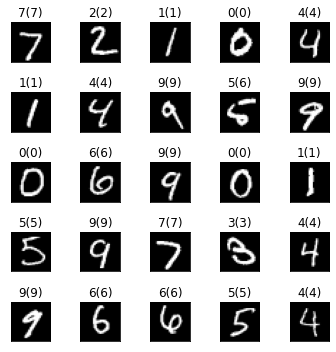

In [ ]:
### BEGIN SOLUTION
fig , axis = plt.subplots(5,5,figsize=(5,5))
index = 0

for row in range(5):
    for column in range(5):
        image, label = MNIST_test[index]
        #with torch.inference_mode():
        label_pred = pred_to_class(model(image)).item()

        axis[row,column].imshow(image.squeeze(), cmap='gray')
        axis[row,column].set_title(f'{label}({label_pred})')
        axis[row,column].get_yaxis().set_visible(False)
        axis[row,column].get_xaxis().set_visible(False)

        index += 1

### END SOLUTION

plt.tight_layout()

In [ ]:
# torch.inference_mode for better performance disabling view tracking

## Exercise 11
Do the same as in the previous exercise, with the same images. But this time, before predicting the label shift all the images 3 pixels to the right. You may use `torch.roll` to perform the shift.


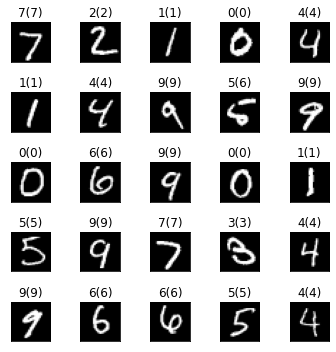

In [ ]:
### BEGIN SOLUTION
fig , axis = plt.subplots(5,5,figsize=(5,5))
index = 0

for row in range(5):
    for column in range(5):
        image, label = MNIST_test[index]
        #with torch.inference_mode():
        torch.roll(image, shifts =3 , dims =1)
        label_pred = pred_to_class(model(image)).item()

        axis[row,column].imshow(image.squeeze(), cmap='gray')
        axis[row,column].set_title(f'{label}({label_pred})')
        axis[row,column].get_yaxis().set_visible(False)
        axis[row,column].get_xaxis().set_visible(False)

        index += 1

### END SOLUTION

plt.tight_layout()

## Exercise 12
Compare the predicted labels, and explain the difference you observe.


Your explanation here.

We are now going to compute the accuracy on the whole test set. Here we could iterate over the `test_set` one image at a time. But to leverage parallelisation and reduce computational cost we will iterate over the test set in batches using the `test_loader`.

## Exercise 13
What's the accuracy of the model on the full test set?


In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
### BEGIN SOLUTION
with torch.inference_mode():
    for input,target in test_loader:
        input, target = input.to(device), target.to(device)
        pred_test = model(input)
        correct += len(torch.where(target == pred_test.argmax(-1))[0])#sum(torch.where(y==pred_test.argmax(-1)))
        total += len(target)
### END SOLUTION

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 91 %


## Exercise 14
What's the accuracy of the model on the full test set if we apply the image shift of 3 pixels to the right? (Verify by plotting the last batch that the images have been shifted correctly)

Accuracy of the network on the 10000 test shifted images: 28 %


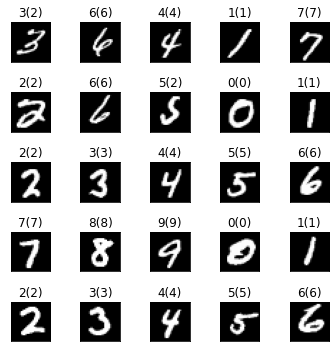

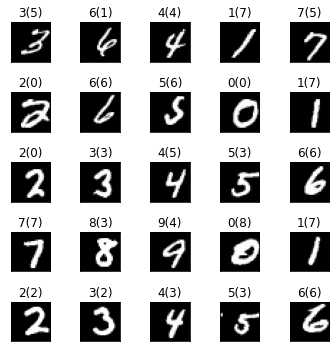

In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
### BEGIN SOLUTION
with torch.inference_mode():
    for input,target in test_loader:
        input, target = input.to(device), target.to(device)
        image_shift = torch.roll(input, shifts=3, dims=2)
        pred_test = model(image_shift)
        correct += len(torch.where(target == pred_test.argmax(-1))[0])#sum(torch.where(y==pred_test.argmax(-1)))
        total += len(target)

# Original last batch
fig , axis = plt.subplots(5,5,figsize=(5,5))
index = -25

for row in range(5):
    for column in range(5):
        image, label = MNIST_test[index]
        #with torch.inference_mode():
        label_pred = pred_to_class(model(image)).item()

        axis[row,column].imshow(image.squeeze(), cmap='gray')
        axis[row,column].set_title(f'{label}({label_pred})')
        axis[row,column].get_yaxis().set_visible(False)
        axis[row,column].get_xaxis().set_visible(False)

        index += 1

plt.tight_layout()

# Shifted
fig2 , axis2 = plt.subplots(5,5,figsize=(5,5))
index2 = -25

for row2 in range(5):
    for column2 in range(5):
        image2, label2 = MNIST_test[index2]
        #with torch.inference_mode():
        image_s = torch.roll(image2, shifts =3 , dims =2)
        label_pred2 = pred_to_class(model(image_s)).item()

        axis2[row2,column2].imshow(image_s.squeeze(), cmap='gray')
        axis2[row2,column2].set_title(f'{label2}({label_pred2})')
        axis2[row2,column2].get_yaxis().set_visible(False)
        axis2[row2,column2].get_xaxis().set_visible(False)

        index2 += 1

plt.tight_layout()

### END SOLUTION


print('Accuracy of the network on the 10000 test shifted images: %d %%' % (
    100 * correct / total))

We will now explore further the performance on the original (non-shifted) version of the test set.

To start with we will look a the confusion matrix. For this we may use the [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions)

## Exercise 15

Plot the confusion matrix over the test set.

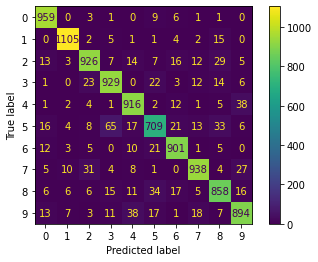

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
### BEGIN SOLUTION
cm = np.zeros((10,10), dtype=np.int16)
labels=[i for i in range(10)]

with torch.inference_mode():
    for input,target in test_loader:
        input, target = input.to(device), target.to(device)
        pred_test = model(input)
        cm = cm+confusion_matrix(target,pred_test.argmax(-1),labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
### END SOLUTION

plt.show()

## Exercise 16

Do the same on the 3-pixel right-shifted images.

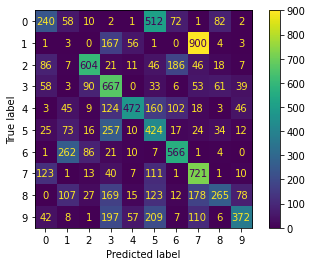

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
### BEGIN SOLUTION
cm = np.zeros((10,10), dtype=np.int16)
labels=[i for i in range(10)]

with torch.inference_mode():
    for input,target in test_loader:
        input, target = input.to(device), target.to(device)
        image_s = torch.roll(i)
        pred_test = model(input)
        cm = cm+confusion_matrix(target,pred_test.argmax(-1),labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
### END SOLUTION

plt.show()

## Exercise 17

Discuss the differences in the confusion matrix. 

**Your discussion here**

# Miss-predictions

One last aspect that we are going to explore is the actual mistakes that the model does. A way to interpret the output of the model is as a probability distribution over possible classes. 


With respect to this predicted probability distribution we may order the model's mistakes on a scale between two extremes:
- examples for which the model is equally confused among all alternative classes
- examples for which the model is 100% certain about it belonging to an incorrect class

This quality can be measured by the entropy of the distribution among incorrect classes.

The entropy can be measured using the [`torch.distributions.Categorical`](https://pytorch.org/docs/stable/distributions.html#categorical).

**Hint:** The model outputs the logits. To obtain an actual probability distribution we must first apply the `torch.softmax` operation on the logits.

**Hint:** That if we want to check the entropy among **alternative** classes we must first set the probability to 0 for the correct class.

**Hint:** In order to find the k-highest (or k-lowest) values of a tensor we may use [`torch.topk`](https://pytorch.org/docs/stable/generated/torch.topk.html)

## [Optional] Exercise 18

Show the 16 test mispredicted images with **highest** prediction entropy among wrong classes.

Show the 16 test mispredicted images with **lowest** prediction entropy among wrong classes.

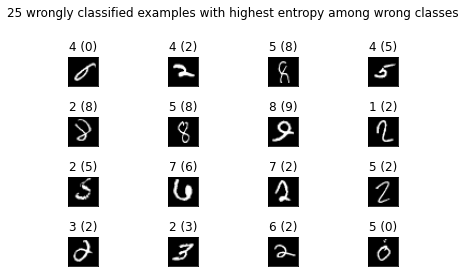

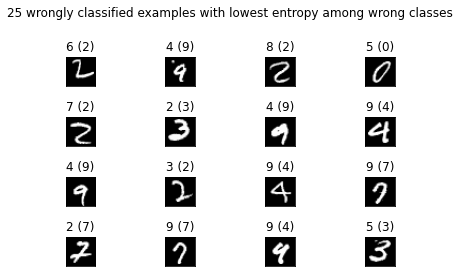

In [ ]:
from torch.distributions import Categorical

all_labels = []
all_logits = []
all_images = [] 

### BEGIN SOLUTION
### END SOLUTION